# Package

In [1]:
import torch
import numpy as np
import os
import matplotlib.pyplot as plt
import pytorch_lightning as pl
from pytorch_lightning import loggers
from pytorch_lightning.callbacks import ModelCheckpoint

In [2]:
%load_ext autoreload
%autoreload 2

# Environment

In [3]:
device = "cuda" if torch.cuda.is_available else "cpu"

def format_bytes(size):
    # 2**10 = 1024
    power = 2**10
    n = 0
    power_labels = {0 : '', 1: 'kilo', 2: 'mega', 3: 'giga', 4: 'tera'}
    while size > power:
        size /= power
        n += 1
    return "%.2f" % size, power_labels[n] + 'bytes'

torch.cuda.get_device_name(), format_bytes(torch.cuda.get_device_properties(device).total_memory)

('GeForce GTX 1080 Ti', ('10.92', 'gigabytes'))

# Load data

In [4]:
run_on = "CRC_DX"

In [5]:
from preprocessing.load_semi_dataset import get_semi_data

train_batch_size, unsup_batch_size = 64, 224
total_batch_size = train_batch_size + unsup_batch_size
trainset, ori_dataset, aug_dataset, valset = get_semi_data(train_batch_size = train_batch_size, unsup_batch_size = unsup_batch_size,
                                                           total_batch_size = total_batch_size, data_type = run_on)



>> Loading the trainset
Total images are 93408


>> Total labels sup patients vs unsup patients: 4672 and 88736


>> Total image in sup dataset, ori dataset and aug dataset
(4672, 4) (16352, 3) (16352, 3)


>> Loading the testset
Total images are 98904




In [6]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size = train_batch_size, shuffle = True, num_workers = 3)
ori_loader = torch.utils.data.DataLoader(ori_dataset, batch_size = unsup_batch_size, shuffle = False, num_workers = 3)
aug_loader = torch.utils.data.DataLoader(aug_dataset, batch_size = unsup_batch_size, shuffle = False, num_workers = 3)
valloader = torch.utils.data.DataLoader(valset, batch_size = total_batch_size, shuffle = False, num_workers = 4)

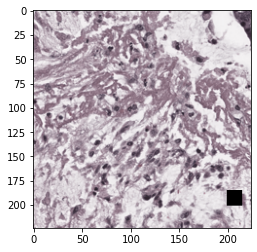

In [7]:
images = next(iter(aug_loader))

# print(images.shape, labels.shape)
def imshow(img):
    inp = img.numpy().transpose((1, 2, 0))
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    # plt.show()
    
imshow(images[0])

# Train UDA

In [8]:
from trainer.semi_supervised.trainer import SemiTrainer

In [9]:
trainer = SemiTrainer(sup_loader = trainloader,
                    ori_loader = ori_loader,
                    aug_loader = aug_loader,
                    valloader = valloader,
                    valset = valset,
                    model_name = "resnet34",
                    netname = "uda_resnet34",
                    save_model_dir = os.path.join(os.getcwd(), "checkpoint", run_on, "uda"),
                    run_on = run_on,
                    
                    #running_mode = "debug",
                    total_step = 6000,
                    warmup_step = 500,
                    base_lr = 3e-2,
                    momentum = 0.9,
                    lr_scheduler = "cosine_anneling",
)

/home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
/home/kientiet/Documents/My Project/python/ucla-cs168/logs/CRC_DX/uda/version_29


In [10]:
trainer.train()

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0.9
    nesterov: False
    weight_decay: 0.008
)

>> Start to train at 1 epoch




>> Start to eval at 1 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_0.pth

>> Start to train at 2 epoch




>> Start to eval at 2 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_1.pth

>> Start to train at 3 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 3 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_2.pth

>> Start to train at 4 epoch




>> Start to eval at 4 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_3.pth

>> Start to train at 5 epoch




>> Start to eval at 5 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_4.pth

>> Start to train at 6 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 6 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_5.pth

>> Start to train at 7 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 7 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_6.pth

>> Start to train at 8 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 8 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_7.pth

>> Start to train at 9 epoch




>> Start to eval at 9 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_8.pth

>> Start to train at 10 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 10 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_9.pth

>> Start to train at 11 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 11 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_10.pth

>> Start to train at 12 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 12 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_11.pth

>> Start to train at 13 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 13 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_12.pth

>> Start to train at 14 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 14 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_13.pth

>> Start to train at 15 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 15 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_14.pth

>> Start to train at 16 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 16 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_15.pth

>> Start to train at 17 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 17 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_16.pth

>> Start to train at 18 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 18 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_17.pth

>> Start to train at 19 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 19 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_18.pth

>> Start to train at 20 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 20 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_19.pth

>> Start to train at 21 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 21 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_20.pth

>> Start to train at 22 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 22 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_21.pth

>> Start to train at 23 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 23 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_22.pth

>> Start to train at 24 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 24 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_23.pth

>> Start to train at 25 epoch




>> Start to eval at 25 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_24.pth

>> Start to train at 26 epoch




>> Start to eval at 26 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_25.pth

>> Start to train at 27 epoch




>> Start to eval at 27 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_26.pth

>> Start to train at 28 epoch




>> Start to eval at 28 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_27.pth

>> Start to train at 29 epoch




>> Start to eval at 29 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_28.pth

>> Start to train at 30 epoch




>> Start to eval at 30 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_29.pth

>> Start to train at 31 epoch




>> Start to eval at 31 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_30.pth

>> Start to train at 32 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 32 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_31.pth

>> Start to train at 33 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 33 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_32.pth

>> Start to train at 34 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 34 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_33.pth

>> Start to train at 35 epoch




>> Start to eval at 35 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_34.pth

>> Start to train at 36 epoch




>> Start to eval at 36 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_35.pth

>> Start to train at 37 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 37 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_36.pth

>> Start to train at 38 epoch




>> Start to eval at 38 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_37.pth

>> Start to train at 39 epoch




>> Start to eval at 39 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_38.pth

>> Start to train at 40 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 40 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_39.pth

>> Start to train at 41 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 41 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_40.pth

>> Start to train at 42 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 42 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_41.pth

>> Start to train at 43 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 43 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_42.pth

>> Start to train at 44 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 44 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_43.pth

>> Start to train at 45 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 45 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_44.pth

>> Start to train at 46 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 46 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_45.pth

>> Start to train at 47 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 47 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_46.pth

>> Start to train at 48 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 48 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_47.pth

>> Start to train at 49 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 49 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_48.pth

>> Start to train at 50 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 50 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_49.pth

>> Start to train at 51 epoch




>> Start to eval at 51 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_50.pth

>> Start to train at 52 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 52 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_51.pth

>> Start to train at 53 epoch




>> Start to eval at 53 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_52.pth

>> Start to train at 54 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 54 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_53.pth

>> Start to train at 55 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 55 epoch


>> Load Exponential Average Weight...




>> Run evaluation...


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_54.pth

>> Start to train at 56 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 56 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_55.pth

>> Start to train at 57 epoch




>> Start to eval at 57 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_56.pth

>> Start to train at 58 epoch




>> Start to eval at 58 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_57.pth

>> Start to train at 59 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 59 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_58.pth

>> Start to train at 60 epoch




>> Start to eval at 60 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_59.pth

>> Start to train at 61 epoch




>> Start to eval at 61 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_60.pth

>> Start to train at 62 epoch




>> Start to eval at 62 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_61.pth

>> Start to train at 63 epoch




>> Start to eval at 63 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_62.pth

>> Start to train at 64 epoch




>> Start to eval at 64 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_63.pth

>> Start to train at 65 epoch




>> Start to eval at 65 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_64.pth

>> Start to train at 66 epoch




>> Start to eval at 66 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_65.pth

>> Start to train at 67 epoch


/home/kientiet/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))




>> Start to eval at 67 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_66.pth

>> Start to train at 68 epoch




>> Start to eval at 68 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_67.pth

>> Start to train at 69 epoch




>> Start to eval at 69 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_68.pth

>> Start to train at 70 epoch




>> Start to eval at 70 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_69.pth

>> Start to train at 71 epoch




>> Start to eval at 71 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_70.pth

>> Start to train at 72 epoch




>> Start to eval at 72 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_71.pth

>> Start to train at 73 epoch




>> Start to eval at 73 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_72.pth

>> Start to train at 74 epoch




>> Start to eval at 74 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_73.pth

>> Start to train at 75 epoch




>> Start to eval at 75 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_74.pth

>> Start to train at 76 epoch




>> Start to eval at 76 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_75.pth

>> Start to train at 77 epoch




>> Start to eval at 77 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_76.pth

>> Start to train at 78 epoch




>> Start to eval at 78 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_77.pth

>> Start to train at 79 epoch




>> Start to eval at 79 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_78.pth

>> Start to train at 80 epoch




>> Start to eval at 80 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_79.pth

>> Start to train at 81 epoch




>> Start to eval at 81 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_80.pth

>> Start to train at 82 epoch




>> Start to eval at 82 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_81.pth

>> Start to train at 83 epoch




>> Start to eval at 83 epoch


>> Load Exponential Average Weight...




>> Run evaluation...

>> Save model to /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25
>> Saving model in /home/kientiet/Documents/My Project/python/ucla-cs168/checkpoint/CRC_DX/uda/version_25/uda_resnet34_82.pth


In [12]:
valset.get_patients()

array(['TCGA-A6-2685', 'TCGA-A6-2686', 'TCGA-A6-3807', 'TCGA-A6-5657',
       'TCGA-A6-5662', 'TCGA-A6-6137', 'TCGA-AA-3678', 'TCGA-AA-3679',
       'TCGA-AA-3681', 'TCGA-AA-3814', 'TCGA-AA-3818', 'TCGA-AA-3833',
       'TCGA-AA-3837', 'TCGA-AA-3848', 'TCGA-AA-3851', 'TCGA-AA-3856',
       'TCGA-AA-3875', 'TCGA-AA-3877', 'TCGA-AA-3950', 'TCGA-AA-3966',
       'TCGA-AA-3968', 'TCGA-AA-A02F', 'TCGA-AA-A02O', 'TCGA-AA-A03F',
       'TCGA-AD-5900', 'TCGA-AD-6964', 'TCGA-AD-A5EJ', 'TCGA-AF-2687',
       'TCGA-AF-4110', 'TCGA-AF-6136', 'TCGA-AF-6672', 'TCGA-AF-A56N',
       'TCGA-AG-3726', 'TCGA-AG-3727', 'TCGA-AG-3881', 'TCGA-AG-3887',
       'TCGA-AG-3892', 'TCGA-AG-3896', 'TCGA-AG-3898', 'TCGA-AG-3901',
       'TCGA-AG-4015', 'TCGA-AG-A016', 'TCGA-AG-A02N', 'TCGA-AG-A02X',
       'TCGA-AH-6544', 'TCGA-AH-6643', 'TCGA-AY-6197', 'TCGA-AY-A71X',
       'TCGA-AY-A8YK', 'TCGA-AZ-4315', 'TCGA-AZ-4615', 'TCGA-AZ-6598',
       'TCGA-AZ-6599', 'TCGA-AZ-6600', 'TCGA-AZ-6601', 'TCGA-CA-5255',
      

In [14]:
patients_table = valset.get_patient_status()

In [15]:
idx = np.where(patients_table[:, 1] == patients_table[0, 1])

In [31]:
patient_true = np.array([])
patients = np.unique(patients_table[:, 1])
for patient_id in patients:
    idx = np.where(patients_table[:, 1] == patient_id)
    patient_true = np.append(patient_true, patients_table[[idx[0][0]], 0].astype(int))

In [35]:
np.sum(patient_true.astype(int) == 0)

74